In [8]:
import seaborn as sns
import pandas as pd
import xarray as xr
import numpy as np
import pdb, sys
from make_ecog_data import *
import matplotlib.pyplot as plt

In [5]:
#####################################
#####################################
#####################################
#Grab data
wrist_lp = '/data1/users/stepeter/cnn_hilbert/ecog_data/xarray/'
sbj = 'cb46fd46'
ecog_srate = 500
ecog_srate = 500
n_chans = 64
chan_select = 44
ecog_dat, _ = get_steve_wrist_epochs(sbj[:3], wrist_lp, event_types=[1, 2], n_chans_all=n_chans, tlim=[-1,1])
ss = ecog_dat[0][chan_select]

Text(0.5, 1.0, 'Relative Positioning')

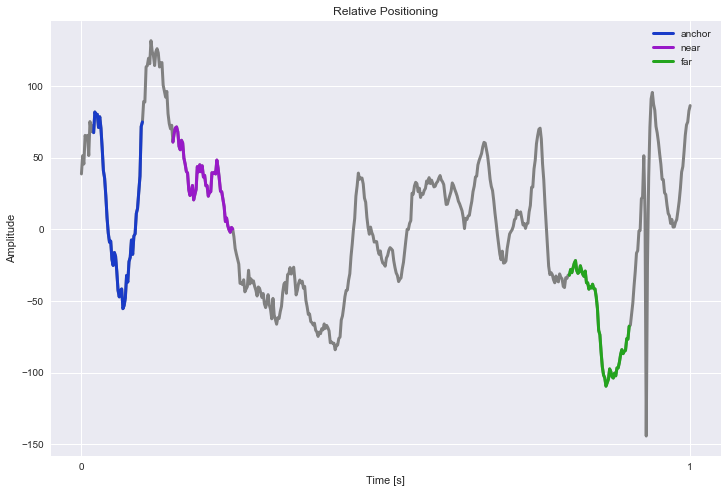

In [11]:
#####################################
#####################################
#####################################
#RP fig
plt.style.use("seaborn")
ffig, (ax1) = plt.subplots(1, 1, figsize=(12, 8), sharey=True)
space = np.linspace(0, 500, 500)
ax1.plot(space, ss[0:500], color="gray", linewidth=3)
ax1.plot(space[10:51], ss[10:51], color='#193BC8', label="anchor", linewidth=3) #1f77b4
ax1.plot(space[75:125], ss[75:125], color="#9819C8", label="near", linewidth=3)
ax1.plot(space[400:450], ss[400:450], color="#24A41E", label="far", linewidth=3) #bcbd22
plt.ylabel("Amplitude")
plt.xticks(np.arange(0, 600, ecog_srate))
ax1.set_xticklabels(np.arange(0,2))
plt.legend()
plt.xlabel("Time [s]")
plt.title("Relative Positioning")

In [13]:
#####################################
#####################################
#####################################
#Sig-trans fig
noise_amount, scaling_factor = 30, 2
sig_dict={}
sig_dict['regular'] = ss
sig_dict['noise'] = add_noise(ecog_dat, noise_amount = noise_amount)[0][chan_select]
sig_dict['scaled'] = scaled(ecog_dat, factor = scaling_factor)[0][chan_select]
sig_dict['negate'] = negate(ecog_dat)[0][chan_select]
sig_dict['flip'] = np.flip(ecog_dat[0][chan_select], -1)

Text(0.5, 0.98, 'Signal Transformations')

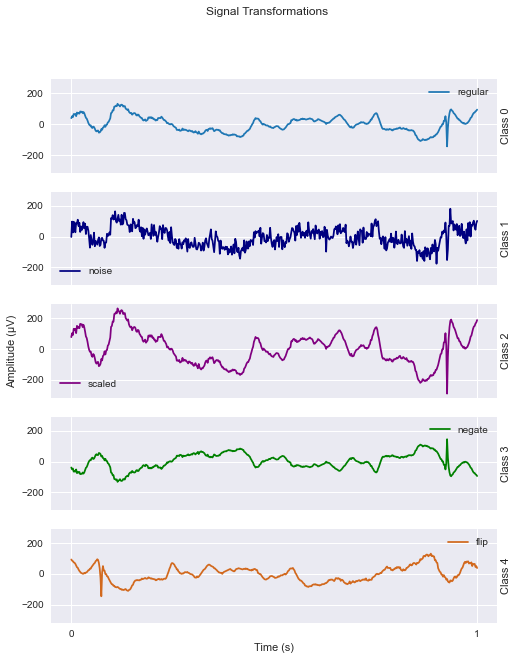

In [18]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(8, 10), sharey=True, sharex=True)
plt.xticks(np.arange(0, 600, ecog_srate))
#1
ax1.plot(sig_dict['regular'], color = "#1f77b4", label="regular")
ax1.set_xticklabels(np.arange(0,2))
ax1.legend()
ax1.yaxis.set_label_position("right")
ax1.set_ylabel("Class 0")
#2
ax2.plot(sig_dict['noise'], color='navy', label="noise")
ax2.set_xticklabels(np.arange(0,2))
ax2.legend()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel("Class 1")
#3
ax3.plot(sig_dict['scaled'], color='purple', label="scaled")
ax3.set_xticklabels(np.arange(0,2))
ax3.legend()
ax3.set_ylabel("Amplitude (µV)")
ax_c = ax3.twinx()
ax_c.set_yticks([])
ax_c.set_ylabel("Class 2")
#4
ax4.plot(sig_dict['negate'], color='green', label="negate")
ax4.set_xticklabels(np.arange(0,2))
ax4.legend()
ax4.yaxis.set_label_position("right")
ax4.set_ylabel("Class 3")
#5
ax5.plot(sig_dict['flip'], color='chocolate', label="flip")
ax5.set_xticklabels(np.arange(0,2))
ax5.legend()
ax5.set_xlabel("Time (s)")
ax5.yaxis.set_label_position("right")
ax5.set_ylabel("Class 4")

fig.suptitle("Signal Transformations")